In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
import os
os.getcwd()

'C:\\Users\\danie\\Documents\\Harvard Extension School\\STAT E-109\\Project'

In [34]:
!python C:\\ProgramData\\Anaconda3\\lib\\site-packages\\cdsclient\\vizquery.py -source=V/137D/XHIP -out.add=B-V,HpMag,Plx,e_Plx -out.max=99999 "-20<HpMag<20" >> "data.txt"

(debug)url:http://vizier.u-strasbg.fr/viz-bin//asu-txt?&-source=V/137D/XHIP&-out.add=B-V,HpMag,Plx,e_Plx&-out.max=99999&-20<HpMag<20


In [35]:
df = pd.read_fwf("data.txt", delimiter=" ", skiprows=47)

In [36]:
df

,(mag),(mag).1,(mas),(mas).1,HIP,Comp,r,AJ2000 (deg),EJ2000 (deg),st (pc),X (pc),Y (pc),Z (pc),SpType,Sun]),Simbad,(mag).2,um (Lsun),Cst
0,------,------,------,-----,------,------,-,------------,------------,-------,------,-------,------,--------------------------,-----,------,------,---------,---
1,0.482,NaN,4.55,1.33,1,NaN,NaN,000.00091185,+01.08901332,NaN,NaN,NaN,NaN,F3 V,NaN,Simbad,9.204,NaN,Psc
2,0.999,6.005,20.85,1.13,2,A,NaN,000.00379738,-19.49883738,47.79,5.2,10.3,-46.4,K3 V,NaN,Simbad,9.402,0.54,Cet
3,-0.019,-1.556,2.26,0.36,3,AB,NaN,000.00500794,+38.85928608,429.40,-148.7,366.4,-167.3,B8V,NaN,Simbad,6.608,436.65,And
4,0.370,2.538,7.45,0.77,4,NaN,NaN,000.00838188,-51.89354611,132.53,46.0,-37.5,-118.5,F0 V,-0.39,Simbad,8.150,9.17,Phe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1.092,2.374,7.43,1.39,100342,NaN,NaN,305.24720080,-15.42858770,129.16,101.5,55.1,-57.9,K0 III,NaN,Simbad,7.930,17.50,Cap
99997,1.498,NaN,2.07,0.82,100343,NaN,NaN,305.24777161,+27.41286820,NaN,NaN,NaN,NaN,K2,NaN,Simbad,8.295,NaN,Vul
99998,1.159,NaN,2.08,1.40,100344,NaN,NaN,305.24795981,+14.61021065,NaN,NaN,NaN,NaN,K0,NaN,Simbad,9.244,NaN,Del
99999,0.790,-1.871,9.48,0.95,100345,A,NaN,305.25269347,-14.78140119,104.23,81.6,45.5,-46.3,K0 :II: + A5:N,0.46,Simbad,3.210,663.00,Cap


In [37]:
df.drop(df.tail(1).index,inplace=True)

In [38]:
df_new_cols = ['B-V(mag)','HpMag(mag)','Plx','e_Plx','HIP','Comp','Gr','RAJ2000(deg)','DEJ2000(deg)','Dist(pc)','X(pc)'\
           ,'Y(pc)','Z(pc)','SpType','[Fe/H](Sun)','Simbad','Hpmag(mag)','Lum(Lsun)','Cst']

change_cols = dict(zip(df.columns, df_new_cols))
change_cols

non_numeric_cols = ['HIP','Comp','Gr','Simbad','Cst','SpType']

In [39]:
df.rename(columns = change_cols, inplace = True)

In [40]:
numeric_cols = df.columns.drop(non_numeric_cols)
numeric_cols

Index(['B-V(mag)', 'HpMag(mag)', 'Plx', 'e_Plx', 'RAJ2000(deg)',
       'DEJ2000(deg)', 'Dist(pc)', 'X(pc)', 'Y(pc)', 'Z(pc)', '[Fe/H](Sun)',
       'Hpmag(mag)', 'Lum(Lsun)'],
      dtype='object')

In [41]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [42]:
df.isna().sum()

B-V(mag)         1005
HpMag(mag)      48494
Plx                 1
e_Plx               1
HIP                 0
Comp            81923
Gr              98427
RAJ2000(deg)        1
DEJ2000(deg)        1
Dist(pc)        48398
X(pc)           48398
Y(pc)           48398
Z(pc)           48398
SpType           1601
[Fe/H](Sun)     83775
Simbad              0
Hpmag(mag)          1
Lum(Lsun)       49352
Cst                 0
dtype: int64

In [43]:
df.drop(labels=['Gr','Comp','Cst','Simbad'], axis=1, inplace = True)

In [44]:
df = df.loc[df['[Fe/H](Sun)'].dropna().index]
df.isna().sum()

B-V(mag)          82
HpMag(mag)      1611
Plx                0
e_Plx              0
HIP                0
RAJ2000(deg)       0
DEJ2000(deg)       0
Dist(pc)        1590
X(pc)           1590
Y(pc)           1590
Z(pc)           1590
SpType            48
[Fe/H](Sun)        0
Hpmag(mag)         0
Lum(Lsun)       1652
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df

,B-V(mag),HpMag(mag),Plx,e_Plx,HIP,RAJ2000(deg),DEJ2000(deg),Dist(pc),X(pc),Y(pc),Z(pc),SpType,[Fe/H](Sun),Hpmag(mag),Lum(Lsun)
4,0.370,2.538,7.45,0.77,4,0.008382,-51.893546,132.53,46.0,-37.5,-118.5,F0 V,-0.39,8.150,9.17
20,0.516,3.712,10.35,0.82,20,0.062951,23.529284,95.90,-23.4,72.0,-58.9,G0,-0.27,8.621,3.38
23,0.456,2.992,11.59,0.68,23,0.074430,13.312211,85.93,-14.3,56.0,-63.6,F3IV/V,-0.27,7.663,6.30
25,0.763,1.879,12.29,0.77,25,0.079366,-44.290297,80.99,24.1,-13.6,-76.1,G5IV,-0.11,6.421,20.14
33,0.466,2.951,8.79,0.83,33,0.099181,-10.462454,112.56,3.6,39.3,-105.4,F3/5 V,-0.08,8.208,6.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99975,0.459,3.346,17.46,0.40,100321,305.181943,82.368154,57.24,-22.3,47.3,23.3,F5IV,-0.05,7.134,4.30
99979,-0.016,1.028,9.61,0.90,100325,305.193844,-14.784893,102.97,80.6,44.9,-45.7,B9/A0 III/IV,0.38,6.092,40.54
99988,0.523,3.407,12.47,0.93,100334,305.223013,-18.156110,79.66,63.6,30.5,-37.0,G0 V,-0.21,7.913,4.45
99990,0.519,3.320,14.97,0.71,100336,305.224948,-45.545307,66.62,54.8,-5.3,-37.5,G5/K0 III + (F),0.00,7.438,4.55


In [47]:
df.dtypes

B-V(mag)        float64
HpMag(mag)      float64
Plx             float64
e_Plx           float64
HIP              object
RAJ2000(deg)    float64
DEJ2000(deg)    float64
Dist(pc)        float64
X(pc)           float64
Y(pc)           float64
Z(pc)           float64
SpType           object
[Fe/H](Sun)     float64
Hpmag(mag)      float64
Lum(Lsun)       float64
dtype: object

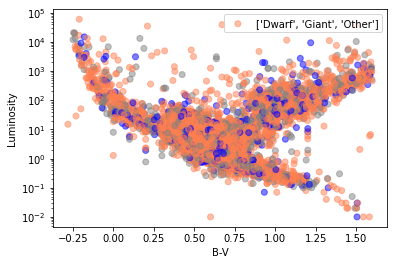

In [172]:
df_temp = df.sample(14563)

import seaborn as sns

ax = plt.gca()
x= np.array(df_temp['B-V(mag)'])
y = np.array(df_temp['Lum(Lsun)'])
#Fe = np.array(df_temp['[Fe/H](Sun)'])

colors = {'Dwarf':'coral', 'Giant':'Blue', 'Other':'gray'}

label = ['Dwarf','Giant','Other']
#cm = plt.cm.get_cmap('RdYlBu')
sc = ax.scatter(np.array(df_temp['B-V(mag)']),np.array(df_temp['Lum(Lsun)']),c=df['SType'].map(colors),alpha=0.5, label=label)

plt.xlabel('B-V')
plt.ylabel('Luminosity')
plt.legend()
ax.set_yscale('log')
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
#plt.colorbar(sc)
plt.show()
#ax.invert_xaxis()

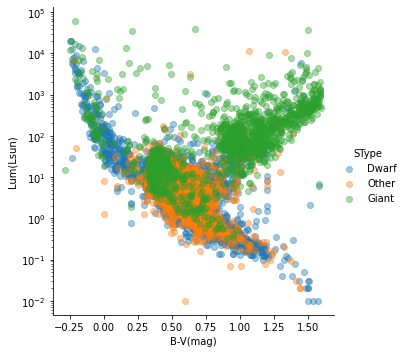

In [191]:
grid = sns.lmplot('B-V(mag)', 'Lum(Lsun)', data=df, hue='SType', fit_reg=False,scatter_kws={"alpha": 0.4})
grid.set( yscale="log")
plt.savefig('HRdiagram.png')
plt.show()

In [56]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

colors = get_colors(Fe, plt.cm.jet)
colors

array([[0.71790006, 1.        , 0.24984187, 1.        ],
       [0.65464896, 1.        , 0.31309298, 1.        ],
       [1.        , 0.79956427, 0.        , 1.        ],
       ...,
       [0.93295383, 1.        , 0.03478811, 1.        ],
       [0.60404807, 1.        , 0.36369386, 1.        ],
       [0.78115117, 1.        , 0.18659077, 1.        ]])

In [104]:
from __future__ import print_function, division
from PyAstronomy import pyasl

In [106]:
b = pyasl.BallesterosBV_T()
T= b.bv2T(df['B-V(mag)'])

In [137]:
def Temp(B_V):
    T= 8540/(B_V+0.865)
    return T

df['Temperature'] =  T

df['Radius(Rsun)'] = 1181.57*np.sqrt(df['Lum(Lsun)']) /df['Temperature']

df['Mass'] = df['Lum(Lsun)']**2/7

df['Spectral_Class'] = [Element[0] for Element in df['SpType']]

In [138]:
df['Spectral_Class']

4        F
20       G
23       F
25       G
33       F
        ..
99975    F
99979    B
99988    G
99990    G
99999    K
Name: Spectral_Class, Length: 14563, dtype: object

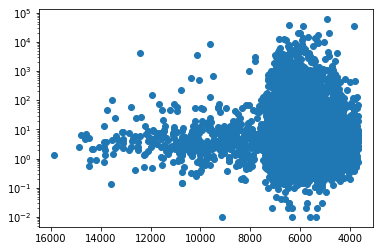

In [107]:
ax1 = plt.gca()
ax1.scatter(T, y)
ax1.set_yscale('log')
ax1.invert_xaxis()


In [64]:
def label_gen_stars(star):
    dwarf = ['D','VI', 'VII', 'V']
    giant = ['IV', 'III', 'II', 'Ib', 'Ia', 'Ia-O']
    for i in dwarf :
        if i in star:
            return 'Dwarf'
    for i in giant:
        if i in star:
            return 'Giant'
    return 'Other'

In [65]:
label_gen_stars(df['SpType'])

'Other'

In [69]:
lista = []
for element in df['SpType']:
    lista.append(label_gen_stars(element))
df['SType'] = lista

In [151]:
final_cols = ['B-V(mag)','Temperature','Plx','Lum(Lsun)','Mass','Radius(Rsun)','SType']

final_cols2 = ['Temperature','Lum(Lsun)','Radius(Rsun)','HpMag(mag)','Mass','SType']

df2 = df[final_cols2]


new_cols = ['Temperature','L','R','A_M','mass','Type']

change_cols2 = dict(zip(final_cols2, new_cols))



In [152]:
change_cols2 = dict(zip(final_cols2, new_cols))
change_cols2
df2.rename(columns = change_cols2, inplace = True)

df2.to_csv('DataStars1.csv', index=False)

<ipython-input-152-c48dd3326fa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = change_cols2, inplace = True)


In [153]:
df2 = df2[df2['R'] != 0]


In [157]:
min(df2['mass'])

1.4285714285714287e-05

In [156]:
df2
df2.to_csv('DataStars1.csv', index=False)